In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 The Data

In [2]:
data, flux = np.loadtxt("comp_proj_data.csv", skiprows = 1, delimiter = ',', unpack = True)


In [25]:
energy = np.arange(0, 10, 0.05)
energy_midpoints = np.arange(0.025,10,0.05)
print(energy_midpoints)
print(len(energy_midpoints))

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975 5.025 5.075 5.125 5.175 5.225 5.275 5.325 5.375
 5.425 5.475 5.525 5.575 5.625 5.675 5.725 5.775 5.825 5.875 5.925 5.975
 6.025 6.075 6.125 6.175 6.225 6.275 6.325 6.375 6.425 6.475 6.525 6.575
 6.625 6.675 6.725 6.775 6.825 6.875 6.925 6.975 7.025 7.075 7.125 7.175
 7.225 7.275 7.325 7.375 7.425 7.475 7.525 7.575 7.625 7.675 7.725 7.775
 7.825 7.875 7.925 7.975 8.025 8.075 8.125 8.175 8.

In [34]:
#%matplotlib tk 

plt.bar(energy_midpoints, data, 0.05)
plt.ylabel('Number of Events')
plt.xlabel('Energy / GeV')
plt.show()


## 3.2 Fit Function

In [26]:
def oscillation_probability(energy, theta_23 = np.pi/4, delta_m2_23 = 2.3e-3, L = 295):
  left = (np.sin(2 * theta_23)) ** 2
  right = (np.sin((1.267 * delta_m2_23 * L) / energy)) ** 2
  return 1 - (left * right)


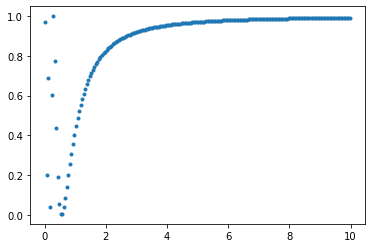

In [29]:
plt.plot(energy_midpoints,oscillation_probability(energy_midpoints),'.')